In [1]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
import math
import statsmodels.api as sm
from scipy.linalg import toeplitz

In [2]:
data = pd.read_excel('Input (1).xlsx',  sheet_name='Russia', header=0, na_values='')
data = pd.melt(data, id_vars=['Date', 'Variable'], var_name='RIC', value_name='value')
data = data.pivot_table('value', ['Date', 'RIC'], 'Variable')
data = data.reset_index()
data

Variable,Date,RIC,BPS,Common Shareholder Equity,EBITDA,EPS,EV,Gross Margin,Market Cap,Net Income,Operating Profit,P_endyear,P_nextjune,ROA,ROE,ROIC,Revenue,Total Assets,"Total Assets Growth, %"
0,2010,AFKS.MM,0.732107,6.793210e+09,4.790723e+09,0.044512,2.982105e+10,4.774219e+11,8.604675e+09,1.719226e+09,4.432130e+09,0.891676,1.117438,6.763311,28.346929,12.252374,1.961443e+10,4.201104e+10,0.051296
1,2010,AFLT.MM,1.095183,1.127600e+09,6.776801e+08,0.280211,4.102450e+09,9.379620e+10,2.907076e+09,2.765555e+08,4.779125e+08,2.617534,2.480212,5.934109,26.566557,28.149237,4.290683e+09,4.525900e+09,0.135649
2,2010,AKRN.MM,29.190990,1.270986e+09,2.256887e+08,5.422110,2.178684e+09,1.896800e+10,1.772737e+09,2.336261e+08,1.773109e+08,37.173954,47.791985,9.807999,23.259901,11.916669,1.238549e+09,2.802012e+09,0.144926
3,2010,AMEZ.MM,0.824647,4.110493e+08,3.596806e+07,0.075712,1.758968e+08,8.838060e+08,2.833233e+08,3.773884e+07,4.132958e+07,0.568403,0.487089,6.607195,9.622841,8.141370,3.366943e+08,5.963942e+08,-0.011727
4,2010,APTK.MM,6.764958,6.426710e+07,3.478935e+07,-1.111773,3.488135e+08,8.460000e+09,3.203215e+08,-1.185708e+07,2.903566e+07,3.371805,3.201891,0.148338,-32.368911,-1.558729,6.948468e+08,5.504602e+08,0.085647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,2019,URKA.MM,1.651596,2.097285e+09,1.629901e+09,1.014152,NaN,1.334100e+11,7.820301e+09,1.263778e+09,1.314489e+09,1.848315,1.717105,13.814735,85.551699,19.520904,2.910847e+09,9.200311e+09,0.138477
576,2019,UTAR.MM,-0.124552,-4.527372e+08,1.577567e+08,-0.082460,1.658594e+09,4.783197e+10,4.222597e+08,-3.146824e+08,6.336376e+07,0.114056,0.099884,-28.241089,NaN,NaN,1.199974e+09,1.122264e+09,-0.166102
577,2019,VLHZ.MM,1.041836,5.215026e+06,9.112801e+05,-0.058737,1.181328e+07,2.513750e+08,4.481764e+06,-2.940155e+05,6.103186e+05,0.895349,0.684416,-1.726396,-5.312530,NaN,3.353245e+07,1.626422e+07,-0.243803
578,2019,VSMO.MM,224.652568,2.588851e+09,6.112800e+08,20.868196,3.277431e+09,3.045109e+10,3.783226e+09,2.220071e+08,3.800918e+08,328.133318,262.793233,4.870407,8.749807,8.243713,1.455255e+09,4.774082e+09,0.155369


In [3]:
# удаление пропусков

delete = pd.DataFrame()

for i in range(len(data)):
    if (math.isnan(data['Market Cap'][i]) or
        math.isnan(data['Net Income'][i]) or
        # data['Market Cap'][i] <= 5000000 or
        math.isnan(data['Common Shareholder Equity'][i]) or
        math.isnan(data['Total Assets Growth, %'][i])):
        delete = delete.append(data.take([i]))
                               
delete = pd.unique(delete['RIC'])
delete = pd.DataFrame(delete)
delete = delete.rename(columns={0: 'RIC'})

data = pd.merge(data, delete, how='outer', on='RIC', indicator=True)
data = data[data['_merge'] == 'left_only']
del data['_merge']
data = data.reset_index()
del data['index']
data

,Date,RIC,BPS,Common Shareholder Equity,EBITDA,EPS,EV,Gross Margin,Market Cap,Net Income,Operating Profit,P_endyear,P_nextjune,ROA,ROE,ROIC,Revenue,Total Assets,"Total Assets Growth, %"
0,2010,AFKS.MM,0.732107,6.793210e+09,4.790723e+09,0.044512,2.982105e+10,4.774219e+11,8.604675e+09,1.719226e+09,4.432130e+09,0.891676,1.117438,6.763311,28.346929,12.252374,1.961443e+10,4.201104e+10,0.051296
1,2011,AFKS.MM,0.907303,8.420065e+09,6.863367e+09,0.052887,3.061903e+10,5.768379e+11,7.044014e+09,9.126102e+08,4.274136e+09,0.729950,0.768447,4.156790,7.826769,8.318672,2.663368e+10,4.416605e+10,-0.005650
2,2012,AFKS.MM,0.867368,8.038755e+09,7.483016e+09,0.050749,2.900394e+10,6.336613e+11,8.103767e+09,1.990541e+08,3.599524e+09,0.839769,0.857709,2.052330,-0.057184,4.904866,3.007779e+10,4.391650e+10,0.016524
3,2013,AFKS.MM,0.986695,9.172189e+09,8.646665e+09,0.256136,2.589802e+10,3.208434e+11,1.317848e+10,9.616660e+08,4.803351e+09,1.365645,1.342049,5.759182,21.450222,5.245914,3.450757e+10,4.464219e+10,-0.031208
4,2014,AFKS.MM,1.115466,1.030670e+10,5.484189e+09,0.039666,2.578450e+10,3.193490e+11,1.989691e+09,2.186730e+09,3.454721e+09,0.206186,0.358770,3.838750,7.378246,8.936243,1.792174e+10,4.324899e+10,-0.547121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,2015,VLHZ.MM,1.112463,5.568557e+06,4.572674e+05,-0.178830,1.933507e+07,2.999580e+08,8.889796e+06,-8.951539e+05,-2.642686e+05,1.775968,1.992172,-4.496705,-14.386456,NaN,4.044373e+07,1.984035e+07,-0.437165
486,2016,VLHZ.MM,1.057584,5.293854e+06,2.606036e+06,0.161747,1.451299e+07,2.894230e+08,9.168063e+06,8.096423e+05,2.121879e+06,1.803699,1.349273,5.280854,16.651020,13.962782,3.391054e+07,1.487604e+07,-0.250213
487,2017,VLHZ.MM,1.313930,6.577020e+06,2.750290e+06,0.206468,1.752794e+07,2.775790e+08,7.813458e+06,1.033495e+06,2.466350e+06,1.560942,1.369743,5.630881,16.047152,14.319124,4.075888e+07,1.899432e+07,0.276839
488,2018,VLHZ.MM,1.413280,7.074327e+06,2.465542e+06,0.165756,1.633841e+07,1.839270e+08,4.160744e+06,8.297099e+05,2.146937e+06,0.831217,0.848188,3.980377,11.800211,10.147486,4.562995e+07,2.150792e+07,0.132334


In [4]:
data.dtypes

Date                           int64
RIC                           object
BPS                          float64
Common Shareholder Equity    float64
EBITDA                       float64
EPS                          float64
EV                           float64
Gross Margin                 float64
Market Cap                   float64
Net Income                   float64
Operating Profit             float64
P_endyear                    float64
P_nextjune                   float64
ROA                          float64
ROE                          float64
ROIC                         float64
Revenue                      float64
Total Assets                 float64
Total Assets Growth, %       float64
dtype: object

In [5]:
data['EV/EBITDA'] = data['EV'] / data['EBITDA']
data['P/E'] = data['P_endyear'] / data['EPS']
data['P/B'] = data['P_endyear'] / data['BPS']
data['BM'] = data['Common Shareholder Equity'] / data['Market Cap']
data['GM/A'] = data['Gross Margin'] / data['Total Assets']

data.head()

,Date,RIC,BPS,Common Shareholder Equity,EBITDA,EPS,EV,Gross Margin,Market Cap,Net Income,...,ROE,ROIC,Revenue,Total Assets,"Total Assets Growth, %",EV/EBITDA,P/E,P/B,BM,GM/A
0,2010,AFKS.MM,0.732107,6.793210e+09,4.790723e+09,0.044512,2.982105e+10,4.774219e+11,8.604675e+09,1.719226e+09,...,28.346929,12.252374,1.961443e+10,4.201104e+10,0.051296,6.224751,20.032209,1.217958,0.789479,11.364201
1,2011,AFKS.MM,0.907303,8.420065e+09,6.863367e+09,0.052887,3.061903e+10,5.768379e+11,7.044014e+09,9.126102e+08,...,7.826769,8.318672,2.663368e+10,4.416605e+10,-0.005650,4.461226,13.801997,0.804527,1.195350,13.060665
2,2012,AFKS.MM,0.867368,8.038755e+09,7.483016e+09,0.050749,2.900394e+10,6.336613e+11,8.103767e+09,1.990541e+08,...,-0.057184,4.904866,3.007779e+10,4.391650e+10,0.016524,3.875969,16.547423,0.968180,0.991978,14.428776
3,2013,AFKS.MM,0.986695,9.172189e+09,8.646665e+09,0.256136,2.589802e+10,3.208434e+11,1.317848e+10,9.616660e+08,...,21.450222,5.245914,3.450757e+10,4.464219e+10,-0.031208,2.995146,5.331724,1.384061,0.695998,7.187000
4,2014,AFKS.MM,1.115466,1.030670e+10,5.484189e+09,0.039666,2.578450e+10,3.193490e+11,1.989691e+09,2.186730e+09,...,7.378246,8.936243,1.792174e+10,4.324899e+10,-0.547121,4.701608,5.198074,0.184843,5.180052,7.383964


In [6]:
sumstats = data.drop('Date', axis=1)
sumstats = sumstats.describe()
# sumstats.to_excel('Summary statistics China.xlsx')
sumstats

,BPS,Common Shareholder Equity,EBITDA,EPS,EV,Gross Margin,Market Cap,Net Income,Operating Profit,P_endyear,...,ROE,ROIC,Revenue,Total Assets,"Total Assets Growth, %",EV/EBITDA,P/E,P/B,BM,GM/A
count,490.000000,4.900000e+02,4.900000e+02,490.000000,4.810000e+02,4.810000e+02,4.900000e+02,4.900000e+02,4.900000e+02,490.000000,...,443.000000,378.000000,4.900000e+02,4.900000e+02,490.000000,481.000000,490.000000,490.000000,490.000000,481.000000
mean,53.806604,9.928980e+09,2.658480e+09,6.540240,1.187511e+10,3.069466e+11,8.890897e+09,1.329294e+09,1.882035e+09,44.296260,...,7.814597,12.127902,1.104005e+10,1.823443e+10,0.065867,17.683732,7.662495,2.333914,1.366669,13.677560
std,321.499506,3.226352e+10,6.958035e+09,47.115561,2.557953e+10,8.045923e+11,1.867245e+10,4.339499e+09,5.289114e+09,220.726624,...,119.532650,23.733030,2.684721e+10,5.126919e+10,0.422400,242.557962,101.320145,15.252483,6.406345,11.272572
min,-180.005493,-4.389125e+09,-1.298949e+08,-115.828713,-7.105132e+07,-1.650599e+09,2.078368e+06,-2.836188e+09,-1.063359e+09,0.001933,...,-2183.411215,-309.226057,4.260769e+06,6.956566e+06,-0.827173,-108.793840,-1144.180591,-123.044586,-12.046291,-3.270188
25%,0.244359,9.641695e+07,4.374682e+07,0.001388,3.861914e+08,2.370532e+09,1.725193e+08,4.949235e+05,1.995741e+07,0.564488,...,2.582760,6.771593,3.972939e+08,6.910041e+08,-0.115777,3.599247,2.204253,0.491660,0.262096,5.328024
50%,1.349707,7.244989e+08,3.009816e+08,0.215673,1.986885e+09,1.752846e+10,1.032074e+09,7.884709e+07,2.149278e+08,2.537085,...,11.957397,11.652005,1.838184e+09,2.548503e+09,0.039083,5.429301,6.288685,1.027364,0.720333,11.961364
75%,7.594181,3.529343e+09,2.056282e+09,1.028129,1.181283e+10,1.873600e+11,8.032900e+09,6.749556e+08,1.335750e+09,10.228986,...,22.377959,17.081403,8.232882e+09,1.194135e+10,0.163926,7.798138,12.181015,2.366894,1.360357,19.379723
max,2904.240601,2.833563e+11,5.966926e+10,629.774660,1.929465e+11,5.496589e+12,1.498995e+11,4.223501e+10,5.129095e+10,2421.488712,...,442.327230,59.953380,1.596219e+11,4.085204e+11,3.932245,5302.721884,1155.674275,257.168651,99.778017,68.622670


In [7]:
prices = pd.read_excel('Raw_Dataset_3.xlsx',  sheet_name='Russia', header=0)
prices = pd.melt(prices, id_vars='RIC', var_name='Date', value_name='Price_close')

prices.head()

,RIC,Date,Price_close
0,ROSN.MM,2009-05-31,6.708420
1,GAZP.MM,2009-05-31,5.785529
2,NVTK.MM,2009-05-31,4.603735
3,GMKN.MM,2009-05-31,113.046840
4,LKOH.MM,2009-05-31,53.309056


In [8]:
prices.dtypes

RIC                    object
Date           datetime64[ns]
Price_close           float64
dtype: object

In [9]:
# первая сортировка по капитализации

big = pd.DataFrame()
small = pd.DataFrame()

for i in range(10):
    one_year = data[data['Date']==2010+i]
    median = statistics.median(one_year['Market Cap'])
    big = big.append(one_year[one_year['Market Cap']>=median])
    small = small.append(one_year[one_year['Market Cap']<median])

In [10]:
# вторая сортировка по фактору стоиомости

# формирование портфелей для Small Cap

SH = pd.DataFrame()
SM = pd.DataFrame()
SL = pd.DataFrame()

for i in range(10):
    one_year = small[small['Date']==2010+i]
    
    quantile_h = one_year['BM'].quantile(0.7)
    quantile_l = one_year['BM'].quantile(0.3)
    
    SH = SH.append(one_year[one_year['BM']>=quantile_h])
    SM = SM.append(one_year[(one_year['BM']<quantile_h) & (one_year['BM']>quantile_l)])
    SL = SL.append(one_year[one_year['BM']<=quantile_l])
    
SH = SH[['Date', 'RIC']]
SM = SM[['Date', 'RIC']]
SL = SL[['Date', 'RIC']]

# формирование портфелей для Big Cap

BH = pd.DataFrame()
BM = pd.DataFrame()
BL = pd.DataFrame()

for i in range(10):
    one_year = big[big['Date']==2010+i]
    
    quantile_h = one_year['BM'].quantile(0.7)
    quantile_l = one_year['BM'].quantile(0.3)
    
    BH = BH.append(one_year[one_year['BM']>=quantile_h])
    BM = BM.append(one_year[(one_year['BM']<quantile_h) & (one_year['BM']>quantile_l)])
    BL = BL.append(one_year[one_year['BM']<=quantile_l])
    
BH = BH[['Date', 'RIC']]
BM = BM[['Date', 'RIC']]
BL = BL[['Date', 'RIC']]

In [11]:
start_date = pd.to_datetime('31.05.2011', dayfirst=True)

SH_p = pd.DataFrame()
SM_p = pd.DataFrame()
SL_p = pd.DataFrame()
BH_p = pd.DataFrame()
BM_p = pd.DataFrame()
BL_p = pd.DataFrame()

for i in range(10):
    one_year = prices[(prices['Date'] >= start_date + pd.to_timedelta(i, unit='y')) &
           (prices['Date'] < start_date + pd.to_timedelta(i+1, unit='y'))]
    
    SH_part = pd.merge(SH[SH['Date']==2010+i], one_year, how='left', on=['RIC'])
    del SH_part['Date_x']
    SH_part = SH_part.rename(columns={'Date_y': 'Date'})
    SH_p = SH_p.append(SH_part)
    
    SM_part = pd.merge(SM[SM['Date']==2010+i], one_year, how='left', on=['RIC'])
    del SM_part['Date_x']
    SM_part = SM_part.rename(columns={'Date_y': 'Date'})
    SM_p = SM_p.append(SM_part)

    SL_part = pd.merge(SL[SL['Date']==2010+i], one_year, how='left', on=['RIC'])
    del SL_part['Date_x']
    SL_part = SL_part.rename(columns={'Date_y': 'Date'})
    SL_p = SL_p.append(SL_part)
    
    BH_part = pd.merge(BH[BH['Date']==2010+i], one_year, how='left', on=['RIC'])
    del BH_part['Date_x']
    BH_part = BH_part.rename(columns={'Date_y': 'Date'})
    BH_p = BH_p.append(BH_part)
    
    BM_part = pd.merge(BM[BM['Date']==2010+i], one_year, how='left', on=['RIC'])
    del BM_part['Date_x']
    BM_part = BM_part.rename(columns={'Date_y': 'Date'})
    BM_p = BM_p.append(BM_part)
    
    BL_part = pd.merge(BL[BL['Date']==2010+i], one_year, how='left', on=['RIC'])
    del BL_part['Date_x']
    BL_part = BL_part.rename(columns={'Date_y': 'Date'})
    BL_p = BL_p.append(BL_part)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\util\_decorators.py:208: FutureWarning: M and Y units are deprecated and will be removed in a future version.
  return func(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\timedeltas.py:134: FutureWarning: M and Y units are deprecated and will be removed in a future version.
  result = Timedelta(r, unit)


In [12]:
# Новый расчёт портфелей

def build_portfolio(portfolio):
    """
    Функция для построения портфелей
    """
    start_cap = 1000
    result = pd.DataFrame()

    for i in range(9):
        year = dates[i*12:12+i*12]
        year_p = pd.merge(year, portfolio, how='left', on='Date')
        n = (pd.unique(year_p['RIC'])).shape[0]
        year_p = year_p.sort_values('Date')
        weights = year_p.head(n)
        weights['Weight'] = start_cap/n/weights['Price_close']
        year_p = pd.merge(year_p, weights, how='left', on='RIC')
        year_p = year_p[['Date_x', 'RIC', 'Price_close_x', 'Weight']]
        year_p = year_p.rename(columns={'Date_x': 'Date',
                                       'Price_close_x': 'Price_close'})
        year_p['Amount'] = year_p['Price_close'] * year_p['Weight']
        year_p = year_p[['Date', 'Amount']].groupby(by='Date').sum()
        year_p = year_p.reset_index()
        start_cap = year_p['Amount'].loc[11]

        result = result.append(year_p, ignore_index=True)
        
    return result

In [13]:
dates = pd.unique(SH_p['Date'])
dates = pd.to_datetime(dates)
dates = pd.DataFrame(dates)
dates = dates.rename(columns={0: 'Date'})
dates

,Date
0,2011-05-31
1,2011-06-30
2,2011-07-31
3,2011-08-31
4,2011-09-30
...,...
111,2020-08-31
112,2020-09-30
113,2020-10-31
114,2020-11-30


In [14]:
# построение всех портфелей

SH_result = build_portfolio(SH_p)
SM_result = build_portfolio(SM_p)
SL_result = build_portfolio(SL_p)
BH_result = build_portfolio(BH_p)
BM_result = build_portfolio(BM_p)
BL_result = build_portfolio(BL_p)

SH_result = SH_result.rename(columns={'Amount': 'SH'})
SM_result = SM_result.rename(columns={'Amount': 'SM'})
SL_result = SL_result.rename(columns={'Amount': 'SL'})
BH_result = BH_result.rename(columns={'Amount': 'BH'})
BM_result = BM_result.rename(columns={'Amount': 'BM'})
BL_result = BL_result.rename(columns={'Amount': 'BL'})

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [15]:
factors = pd.merge(SH_result, SM_result, how='inner', on='Date')
factors = pd.merge(factors, SL_result, how='inner', on='Date')
factors = pd.merge(factors, BH_result, how='inner', on='Date')
factors = pd.merge(factors, BM_result, how='inner', on='Date')
factors = pd.merge(factors, BL_result, how='inner', on='Date')
factors

,Date,SH,SM,SL,BH,BM,BL
0,2011-05-31,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
1,2011-06-30,1003.609106,965.109417,1001.368232,1037.407014,999.511838,975.402061
2,2011-07-31,974.068015,1003.334639,1014.552649,1078.441699,1028.050983,1013.030432
3,2011-08-31,804.709128,836.138794,799.213239,899.459605,839.189191,871.678405
4,2011-09-30,616.070650,619.591394,633.508255,698.208214,614.579403,683.308433
...,...,...,...,...,...,...,...
103,2019-12-31,850.599314,739.314596,1234.127557,1642.647098,688.918100,1059.256834
104,2020-01-31,985.339067,770.649863,1337.334563,1643.295363,706.346835,1051.736898
105,2020-02-29,902.487451,679.449332,1187.998806,1405.753070,609.665637,944.037301
106,2020-03-31,750.427454,528.333421,949.343113,1014.726677,491.541834,775.079701


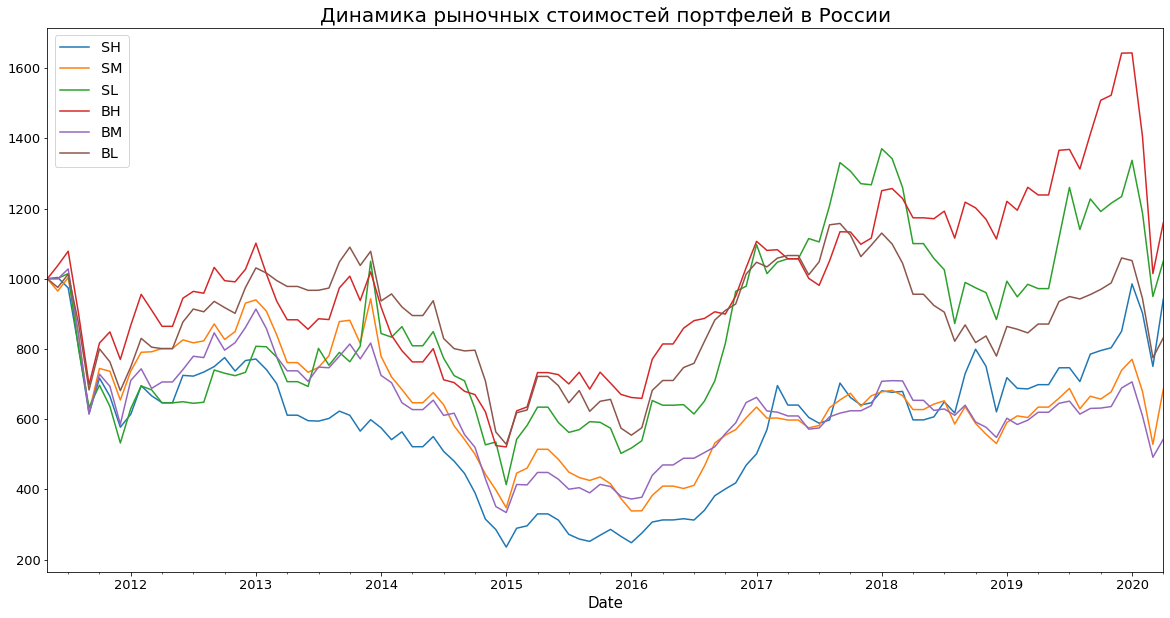

In [16]:
factors.plot(x='Date', y=['SH', 'SM', 'SL', 'BH', 'BM', 'BL'], figsize=(20, 10))
plt.legend(fontsize=20)
plt.legend(fontsize="x-large")
plt.title('Динамика рыночных стоимостей портфелей в России', fontsize=20)
plt.xlabel('Date', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig('3FF(3x2) Russia.png')

In [17]:
factors['SH%'] = factors['SH'].pct_change() * 100
factors['SM%'] = factors['SM'].pct_change() * 100
factors['SL%'] = factors['SL'].pct_change() * 100
factors['BH%'] = factors['BH'].pct_change() * 100
factors['BM%'] = factors['BM'].pct_change() * 100
factors['BL%'] = factors['BL'].pct_change() * 100

factors = factors.fillna(0)

factors

,Date,SH,SM,SL,BH,BM,BL,SH%,SM%,SL%,BH%,BM%,BL%
0,2011-05-31,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2011-06-30,1003.609106,965.109417,1001.368232,1037.407014,999.511838,975.402061,0.360911,-3.489058,0.136823,3.740701,-0.048816,-2.459794
2,2011-07-31,974.068015,1003.334639,1014.552649,1078.441699,1028.050983,1013.030432,-2.943486,3.960714,1.316640,3.955505,2.855308,3.857729
3,2011-08-31,804.709128,836.138794,799.213239,899.459605,839.189191,871.678405,-17.386762,-16.664016,-21.225060,-16.596363,-18.370859,-13.953384
4,2011-09-30,616.070650,619.591394,633.508255,698.208214,614.579403,683.308433,-23.441822,-25.898499,-20.733513,-22.374700,-26.765095,-21.610031
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,2019-12-31,850.599314,739.314596,1234.127557,1642.647098,688.918100,1059.256834,5.858083,9.073789,1.562492,7.873865,8.321960,7.205339
104,2020-01-31,985.339067,770.649863,1337.334563,1643.295363,706.346835,1051.736898,15.840567,4.238421,8.362750,0.039465,2.529870,-0.709926
105,2020-02-29,902.487451,679.449332,1187.998806,1405.753070,609.665637,944.037301,-8.408437,-11.834237,-11.166671,-14.455240,-13.687496,-10.240165
106,2020-03-31,750.427454,528.333421,949.343113,1014.726677,491.541834,775.079701,-16.848987,-22.240939,-20.088883,-27.816151,-19.375178,-17.897344


In [18]:
factors['SMB'] = 1/3 * (factors['SH%'] + factors['SM%'] + factors['SL%']) - 1/3 * (factors['BH%'] + factors['BM%'] + factors['BL%'])
factors['HML'] = 1/2 * (factors['SH%'] + factors['BH%']) - 1/2 * (factors['SL%'] + factors['BL%'])

factors

,Date,SH,SM,SL,BH,BM,BL,SH%,SM%,SL%,BH%,BM%,BL%,SMB,HML
0,2011-05-31,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2011-06-30,1003.609106,965.109417,1001.368232,1037.407014,999.511838,975.402061,0.360911,-3.489058,0.136823,3.740701,-0.048816,-2.459794,-1.407805,3.212291
2,2011-07-31,974.068015,1003.334639,1014.552649,1078.441699,1028.050983,1013.030432,-2.943486,3.960714,1.316640,3.955505,2.855308,3.857729,-2.778225,-2.081175
3,2011-08-31,804.709128,836.138794,799.213239,899.459605,839.189191,871.678405,-17.386762,-16.664016,-21.225060,-16.596363,-18.370859,-13.953384,-2.118411,0.597660
4,2011-09-30,616.070650,619.591394,633.508255,698.208214,614.579403,683.308433,-23.441822,-25.898499,-20.733513,-22.374700,-26.765095,-21.610031,0.225331,-1.736489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,2019-12-31,850.599314,739.314596,1234.127557,1642.647098,688.918100,1059.256834,5.858083,9.073789,1.562492,7.873865,8.321960,7.205339,-2.302267,2.482058
104,2020-01-31,985.339067,770.649863,1337.334563,1643.295363,706.346835,1051.736898,15.840567,4.238421,8.362750,0.039465,2.529870,-0.709926,8.860776,4.113603
105,2020-02-29,902.487451,679.449332,1187.998806,1405.753070,609.665637,944.037301,-8.408437,-11.834237,-11.166671,-14.455240,-13.687496,-10.240165,2.324519,-0.728420
106,2020-03-31,750.427454,528.333421,949.343113,1014.726677,491.541834,775.079701,-16.848987,-22.240939,-20.088883,-27.816151,-19.375178,-17.897344,1.969954,-3.339456


In [19]:
factors.to_excel('3FF (3x2) factors Russia.xlsx')

In [20]:
# Подтягиваем рыночную премию за риск

premium = pd.read_excel('Raw_Dataset_3.xlsx',  sheet_name='Market Factor Russia', header=0)
premium['Date'] = pd.to_datetime(premium['Date'], dayfirst=True)
premium

,Date,Risk Free Rate,Market Return,Market Premium
0,2010-02-28,2.575079,-4.271921,-6.847000
1,2010-03-31,3.013554,11.456214,8.442660
2,2010-04-30,0.128430,0.022894,-0.105536
3,2010-05-31,-5.139801,-11.968795,-6.828994
4,2010-06-30,-0.948685,-3.267393,-2.318708
...,...,...,...,...
126,2020-08-31,-0.453484,1.957163,2.410646
127,2020-09-30,-5.848791,-6.363420,-0.514628
128,2020-10-31,-3.663407,-9.495889,-5.832481
129,2020-11-30,8.052676,20.192200,12.139523


In [21]:
allfactors = pd.merge(factors[['Date', 'SMB', 'HML']], premium[['Date', 'Market Premium']], how='inner', on='Date')
allfactors

,Date,SMB,HML,Market Premium
0,2011-05-31,0.000000,0.000000,-4.983158
1,2011-06-30,-1.407805,3.212291,0.386352
2,2011-07-31,-2.778225,-2.081175,-0.811975
3,2011-08-31,-2.118411,0.597660,-7.999347
4,2011-09-30,0.225331,-1.736489,-9.224781
...,...,...,...,...
103,2019-12-31,-2.302267,2.482058,2.651465
104,2020-01-31,8.860776,4.113603,-4.219011
105,2020-02-29,2.324519,-0.728420,-10.101373
106,2020-03-31,1.969954,-3.339456,-4.423168


In [22]:
# построение исходного портфеля

all_p = data[['Date', 'RIC']]
all_p

,Date,RIC
0,2010,AFKS.MM
1,2011,AFKS.MM
2,2012,AFKS.MM
3,2013,AFKS.MM
4,2014,AFKS.MM
...,...,...
485,2015,VLHZ.MM
486,2016,VLHZ.MM
487,2017,VLHZ.MM
488,2018,VLHZ.MM


In [23]:
start_date = pd.to_datetime('31.05.2011', dayfirst=True)
portfolio = pd.DataFrame()

for i in range(10):
    one_year = prices[(prices['Date'] >= start_date + pd.to_timedelta(i, unit='y')) &
           (prices['Date'] < start_date + pd.to_timedelta(i+1, unit='y'))]
    
    portfolio_part = pd.merge(all_p[all_p['Date']==2010+i], one_year, how='left', on=['RIC'])
    del portfolio_part['Date_x']
    portfolio_part = portfolio_part.rename(columns={'Date_y': 'Date'})
    portfolio = portfolio.append(portfolio_part)

In [24]:
portfolio_result = build_portfolio(portfolio)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [25]:
portfolio_result['Return'] = portfolio_result['Amount'].pct_change() * 100
portfolio_result = portfolio_result.fillna(0)
portfolio_result = pd.merge(portfolio_result, premium[['Date', 'Risk Free Rate']], how='inner', on='Date')
portfolio_result['y_return'] = portfolio_result['Return'] - portfolio_result['Risk Free Rate']
portfolio_result = portfolio_result.rename(columns={'Amount': 'portfolio'})
portfolio_result

,Date,portfolio,Return,Risk Free Rate,y_return
0,2011-05-31,1000.000000,0.000000,-1.841909,1.841909
1,2011-06-30,995.592136,-0.440786,0.572559,-1.013345
2,2011-07-31,1019.141366,2.365349,3.870123,-1.504773
3,2011-08-31,843.074517,-17.275999,-5.371510,-11.904489
4,2011-09-30,643.394165,-23.684781,-11.993232,-11.691548
...,...,...,...,...,...
103,2019-12-31,1016.361837,6.785071,5.028329,1.756742
104,2020-01-31,1063.851831,4.672548,2.162740,2.509808
105,2020-02-29,939.464441,-11.692172,-4.227564,-7.464609
106,2020-03-31,744.137236,-20.791336,-17.524373,-3.266963


In [26]:
# трёхфакторная модель Фамы и Френча

model = pd.merge(allfactors, portfolio_result[['Date', 'y_return']], how='inner', on='Date')
model

,Date,SMB,HML,Market Premium,y_return
0,2011-05-31,0.000000,0.000000,-4.983158,1.841909
1,2011-06-30,-1.407805,3.212291,0.386352,-1.013345
2,2011-07-31,-2.778225,-2.081175,-0.811975,-1.504773
3,2011-08-31,-2.118411,0.597660,-7.999347,-11.904489
4,2011-09-30,0.225331,-1.736489,-9.224781,-11.691548
...,...,...,...,...,...
103,2019-12-31,-2.302267,2.482058,2.651465,1.756742
104,2020-01-31,8.860776,4.113603,-4.219011,2.509808
105,2020-02-29,2.324519,-0.728420,-10.101373,-7.464609
106,2020-03-31,1.969954,-3.339456,-4.423168,-3.266963


In [27]:
X = model[['Market Premium', 'SMB', 'HML']].values
X = sm.add_constant(X)
Y = np.array(model['y_return'])

FF3_OLS = sm.OLS(Y, X)
result_OLS = FF3_OLS.fit()
print(result_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     51.71
Date:                Fri, 07 May 2021   Prob (F-statistic):           1.54e-20
Time:                        17:08:45   Log-Likelihood:                -276.93
No. Observations:                 108   AIC:                             561.9
Df Residuals:                     104   BIC:                             572.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3585      0.310      1.158      0.2

In [28]:
ols_resid = result_OLS.resid
resid_fit = sm.OLS(ols_resid[1:], sm.add_constant(ols_resid[:-1])).fit()
print(resid_fit.tvalues[1])
print(resid_fit.pvalues[1])

-0.32836779573913316
0.7432875327096504


In [29]:
rho = resid_fit.params[1]
order = toeplitz(range(len(ols_resid)))

sigma = rho**order
FF3_GLS = sm.GLS(Y, X, sigma=sigma)
result_GLS = FF3_GLS.fit()
print(result_GLS.summary())

                            GLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.601
Model:                            GLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     52.29
Date:                Fri, 07 May 2021   Prob (F-statistic):           1.09e-20
Time:                        17:08:55   Log-Likelihood:                -276.88
No. Observations:                 108   AIC:                             561.8
Df Residuals:                     104   BIC:                             572.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3549      0.300      1.183      0.2